<a href="https://colab.research.google.com/github/Arush2604/summerprojectNYU/blob/master/SummerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, UpSampling2D
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tensorflow.keras.regularizers import l2
from google.colab import drive
#drive.mount('/content/drive')



In [0]:
bee = np.load('/content/drive/My Drive/full_numpy_bitmap_bee.npy').reshape(120890,28,28,1)
crocodile = np.load('/content/drive/My Drive/full_numpy_bitmap_crocodile.npy').reshape(127932,28,28,1)
dragon = np.load('/content/drive/My Drive/full_numpy_bitmap_dragon.npy').reshape(124362,28,28,1)
eye = np.load('/content/drive/My Drive/full_numpy_bitmap_eye.npy').reshape(125888,28,28,1)
fish = np.load('/content/drive/My Drive/full_numpy_bitmap_fish.npy').reshape(134150,28,28,1)
flamingo = np.load('/content/drive/My Drive/full_numpy_bitmap_flamingo.npy').reshape(124569,28,28,1)
hedgehog = np.load('/content/drive/My Drive/full_numpy_bitmap_hedgehog.npy').reshape(120527,28,28,1)
hotdog = np.load('/content/drive/My Drive/full_numpy_bitmap_hot dog.npy').reshape(181999,28,28,1)
octopus = np.load('/content/drive/My Drive/full_numpy_bitmap_octopus.npy').reshape(150152,28,28,1)
telephone = np.load('/content/drive/My Drive/full_numpy_bitmap_telephone.npy').reshape(127885,28,28,1)

results = ['bee',
          'crocodile',
          'dragon',
          'eye',
          'fish',
          'flamingo',
          'hedgehog',
          'hotdog',
          'octopus',
          'telephone']
classes = 10
samples = 40000

FileNotFoundError: ignored

In [0]:
bee = bee[0:samples]
crocodile = crocodile[0:samples]
dragon = dragon[0:samples]
eye = eye[0:samples]
fish = fish[0:samples]
flamingo = flamingo[0:samples]
hedgehog = hedgehog[0:samples]
hotdog = hotdog[0:samples]
octopus = octopus[0:samples]
telephone = telephone[0:samples]

X = np.concatenate((bee,
                    crocodile,
                    dragon,
                    eye,
                    fish,
                    flamingo,
                    hedgehog,
                    hotdog,
                    octopus,
                    telephone),
                    axis = 0)
print(X.shape)
#X = X.reshape(50000,28,28,1)
X = X/255
Y = np.empty((samples * classes, 1))

for i in range(0, classes) :
  Y[i * samples : samples * (i + 1)] = i
print(Y.shape)

(400000, 28, 28, 1)
(400000, 1)


In [0]:
from sklearn.model_selection import train_test_split
xtr , xts , ytr, yts = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(xts.shape)

(80000, 28, 28, 1)


In [0]:
K.clear_session()
l=.001
model = tf.keras.models.Sequential()
model.add(Conv2D(64, (5,5), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (5,5), activation = 'relu', padding = 'valid'))     
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation = 'relu', kernel_regularizer = l2(l)))
model.add(Dense(84,activation = 'relu', kernel_regularizer = l2(l)))
model.add(Dense(classes,activation = 'softmax'))
opt = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(xtr,ytr,validation_split = 0.2, batch_size = 100, epochs = 10)

Train on 256000 samples, validate on 64000 samples
Epoch 1/10
256000/256000 [==============================] - 14s 55us/sample - loss: 0.6716 - acc: 0.8295 - val_loss: 0.4814 - val_acc: 0.8805
Epoch 2/10
256000/256000 [==============================] - 14s 53us/sample - loss: 0.4341 - acc: 0.8897 - val_loss: 0.4026 - val_acc: 0.8980
Epoch 3/10
256000/256000 [==============================] - 14s 53us/sample - loss: 0.3824 - acc: 0.9013 - val_loss: 0.3869 - val_acc: 0.8988
Epoch 4/10
256000/256000 [==============================] - 13s 53us/sample - loss: 0.3574 - acc: 0.9073 - val_loss: 0.3647 - val_acc: 0.9051
Epoch 5/10
256000/256000 [==============================] - 14s 53us/sample - loss: 0.3401 - acc: 0.9108 - val_loss: 0.3667 - val_acc: 0.9023
Epoch 6/10
256000/256000 [==============================] - 14s 53us/sample - loss: 0.3269 - acc: 0.9145 - val_loss: 0.3403 - val_acc: 0.9098
Epoch 7/10
256000/256000 [==============================] - 14s 53us/sample - loss: 0.3167 - acc:

test accuracy: 91.0%


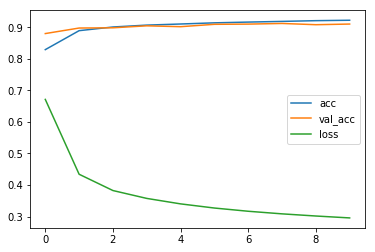

In [0]:
import sklearn
xts = xts.reshape(xts.shape[0], 28, 28, 1)
yhat = model.predict_proba(xts)
yhat_max = np.ones(len(yhat[:,0]))
for i in range(len(yhat[:,0])) :
  yhat_max[i] = np.argmax(yhat[i])

accTs = sklearn.metrics.accuracy_score(yts, yhat_max)
print('test accuracy: ' + str(accTs * 100) + '%')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.legend(['acc','val_acc','loss'])
plt.show()
#print ("test accuracy-", acc , "%")

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [0]:
import skimage
inputSamples = 10
inputSample = 6
testSample = 3
inputs = [0]* inputSamples
inputdr = [0]* inputSample
inputtest = [0]* inputSample
i = 0
j = 0

for i in range (0,inputSamples):
  j = i+1
  inputs[i] = skimage.io.imread('/content/drive/My Drive/input/img' + str(j) + '.png')
k = 0  
for k in range (0,inputSample):
  z = k+1
  if z == 2:
    z = z+1
  inputdr[k] = skimage.io.imread('/content/drive/My Drive/input/papimg' + str(z) + '.png')
for q in range (0,inputSample):
  n = q+1
  inputtest[q] = skimage.io.imread('/content/drive/My Drive/input/testimg' + str(n) + '.png')


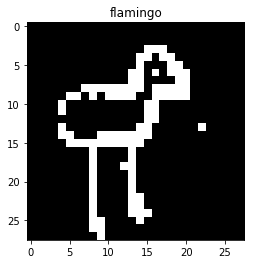

In [0]:
def test(img):
  img = img[:,:,0]
  img = img.reshape(1,28,28,1)
  yhat = model.predict_proba(img)
  img = img.reshape(28,28)
  plt.title(results[np.argmax(yhat)])
  plt.imshow(img,'gray')
  plt.show()
  
def testdraw(img):
  img = img[:,:,0]
  img = img.reshape(1,28,28,1)
  img = img/255
  img[img>.6] =1
  img[img<.7] =0
  img = 1-img
  yhat = model.predict_proba(img)
  img = img.reshape(28,28)
  plt.title(results[np.argmax(yhat)])
  plt.imshow(img, 'gray')
  
for cim in range(len(inputtest)) :
  test(compInputs[cim])